In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

# Business Problem: 1
Prepare a classification model using SVM for salary data

In [2]:
test_tmp = pd.read_csv("C:/Users/DIKSHA/Downloads/SalaryData_Test(1).csv")
train_tmp = pd.read_csv("C:/Users/DIKSHA/Downloads/SalaryData_Train(1).csv")

In [3]:
df_tmp = test_tmp.append(train_tmp)

In [4]:
test = test_tmp.copy()
train = train_tmp.copy()

In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [8]:
number = LabelEncoder()

In [9]:
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [10]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [11]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [12]:
mapping = {' >50K': 1, ' <=50K': 2}

In [13]:
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})

In [14]:
df = train.append(test)

In [15]:
df1 = df.copy()

In [16]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [17]:
df1.shape

(45221, 14)

In [18]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0


In [19]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Finding Correlation

In [20]:
corr = df1.corr()

<AxesSubplot:>

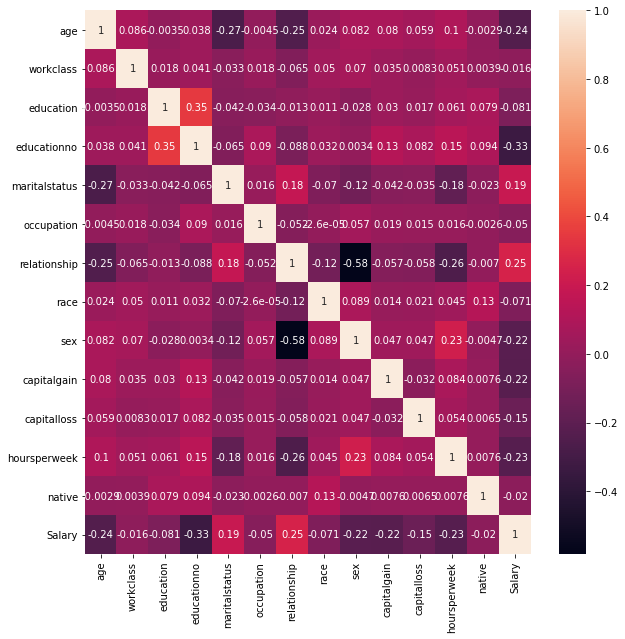

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [22]:
plt.rcParams["figure.figsize"] = 9,5

Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


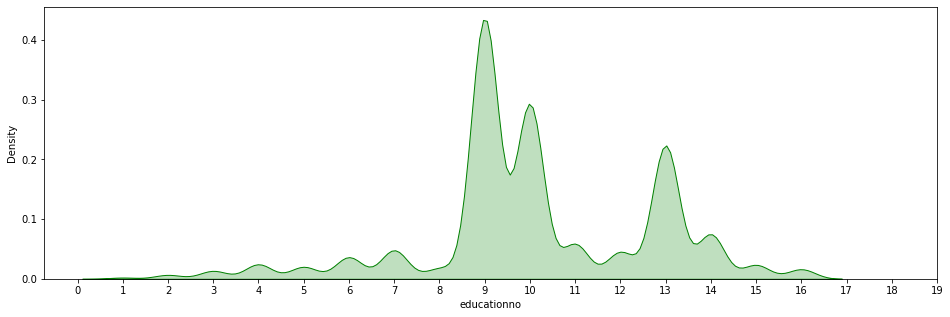

In [23]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The Data is negatively skewed and has low kurtosis value

Most of people have education Number of years of education 9 - 10

In [24]:
dfa = df_tmp[df_tmp.columns[0:13]]
obj_colum = dfa.select_dtypes(include='object').columns.tolist()

<ipython-input-25-6989d91a26fc>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


ValueError: num must be 1 <= num <= 4, not 5

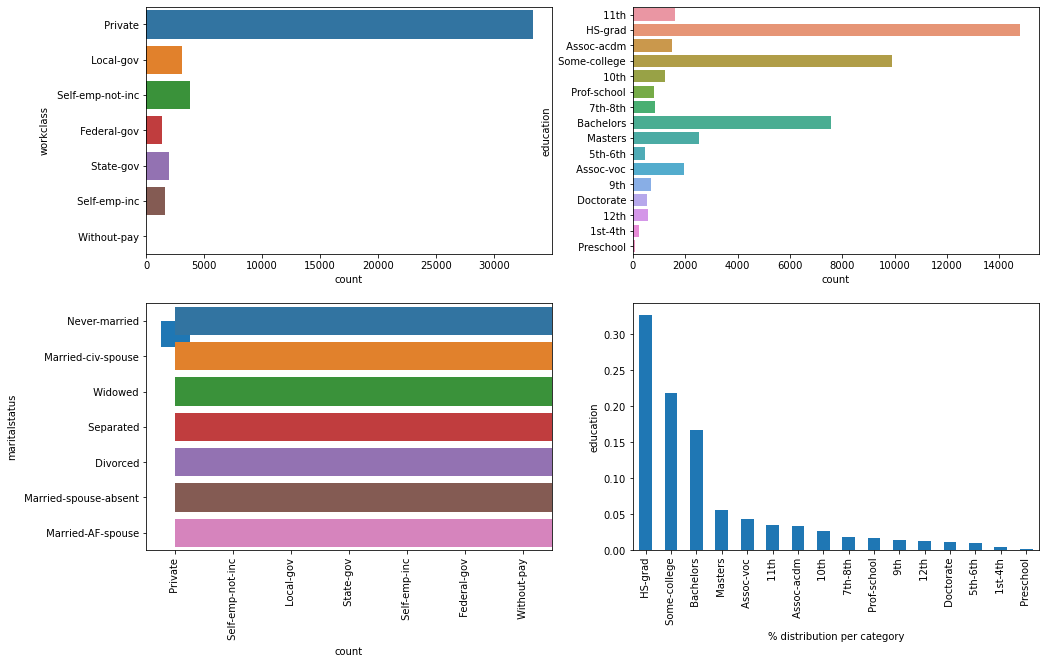

In [25]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df_tmp[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

Majority of the workclass is in Private Sector

Also for education majority of the people have HS graduation or some college degree

In [26]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

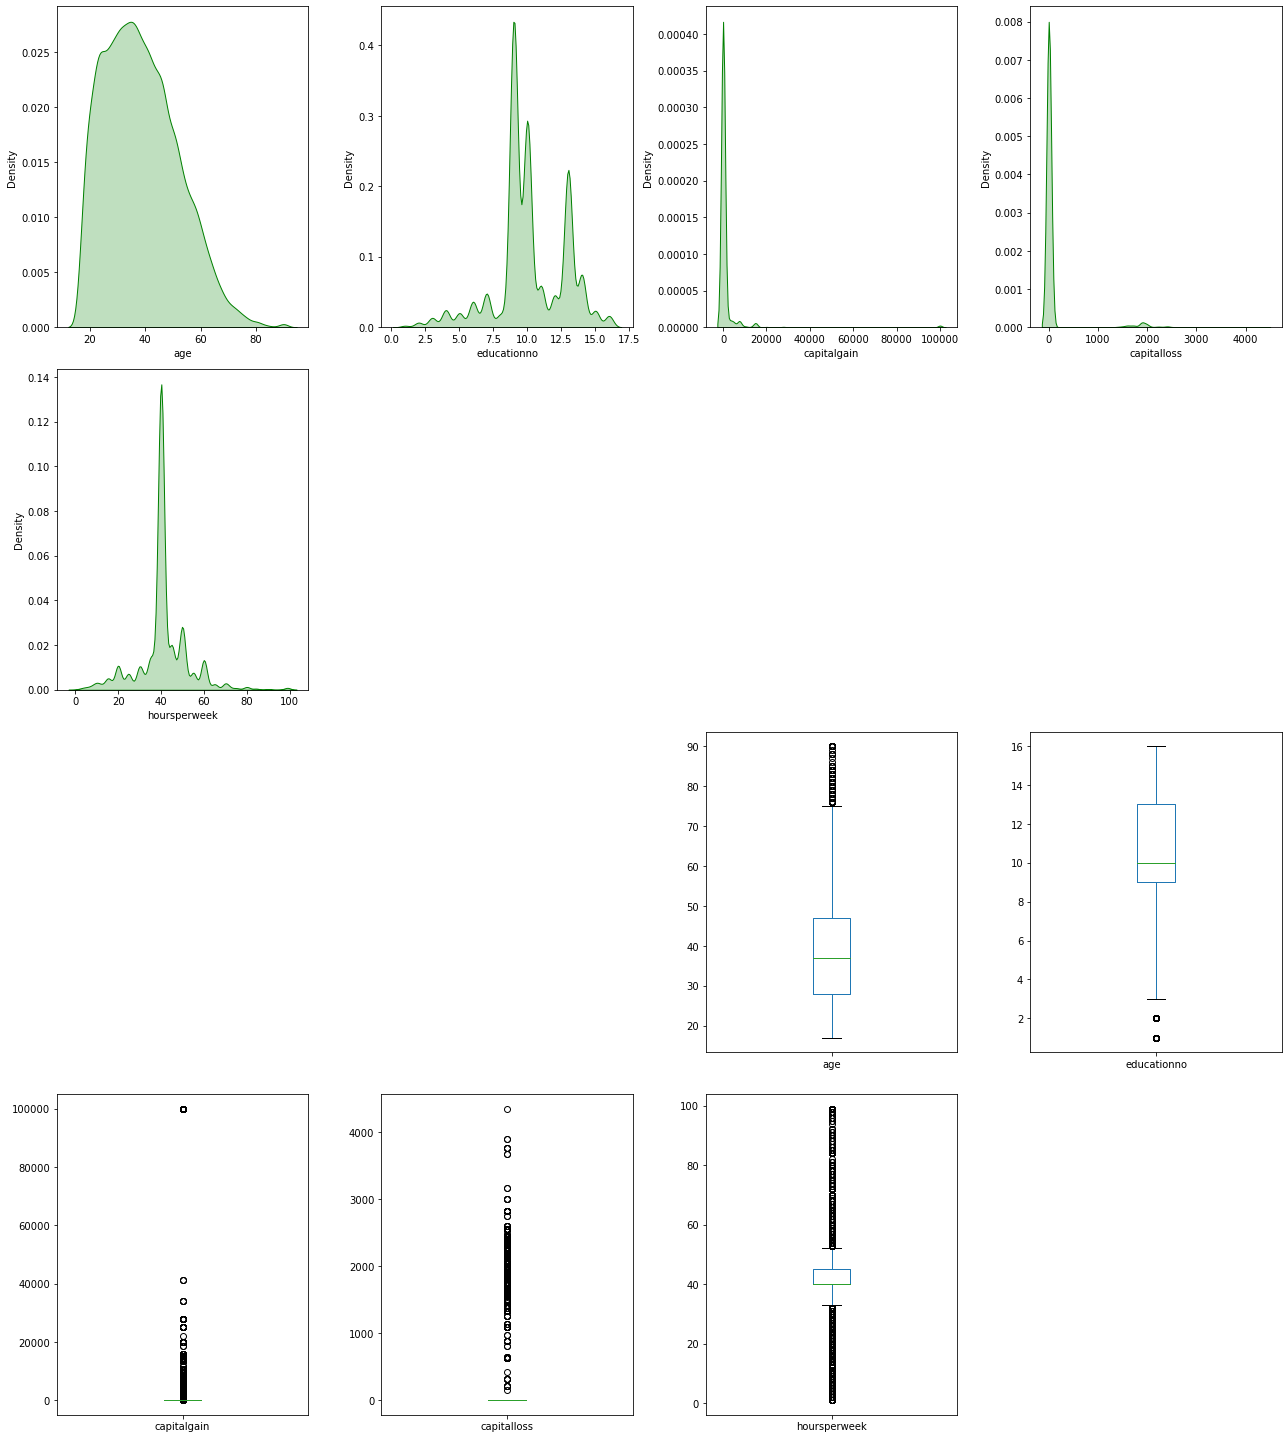

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.532784,-0.310621,11.788871,4.517536,0.340536
kurtosis,-0.155931,0.635045,150.147899,19.376085,3.201287


In [27]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

# SVM

In [28]:
col = df1.columns

In [29]:
x_train = train[col[0:13]]
y_train = train[col[13]]
x_test = test[col[0:13]]
y_test = test[col[13]]

In [30]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [31]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

# Linear

In [32]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.8097609561752988


# Poly

In [33]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8435590969455511


# RBF

In [34]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8432934926958832


# Sigmoid

In [35]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.5768924302788845


# Conclusion

Poly Model gives the best accuracy

# Business Problem: 2
Classify the SizeCategorie using SVM

In [37]:
df = pd.read_csv("C:/Users/DIKSHA/Downloads/forestfires (1).csv")

In [38]:
df1 = df.copy()

In [39]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [40]:
df1.shape

(517, 31)

In [41]:
df1[df1.columns[0:11]].describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [42]:
df1[df1.columns[0:11]].isnull().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

# Correlation

In [43]:
corr = df1[df1.columns[0:11]].corr()

<AxesSubplot:>

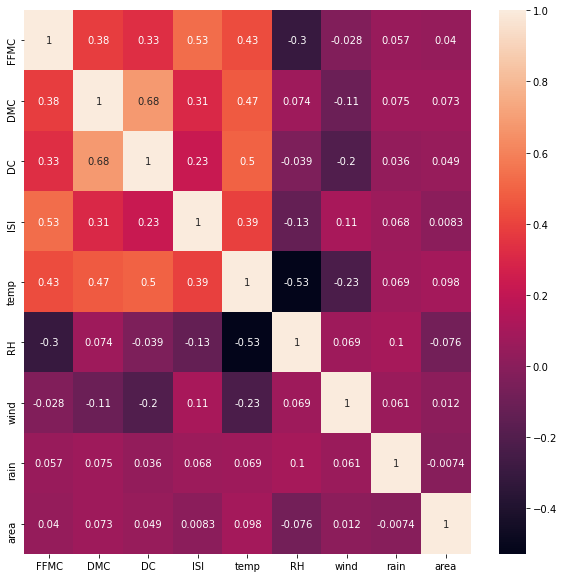

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Outlier Check

C:\Users\DIKSHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


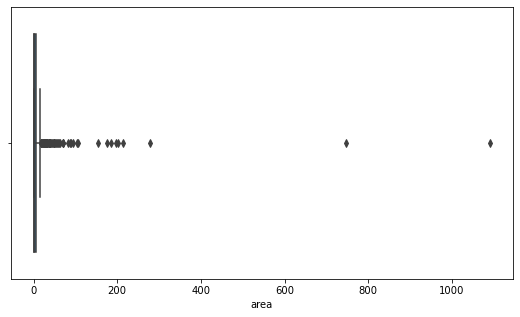

In [45]:
ax = sns.boxplot(df1['area'])

There are 3 Outliers in our data

In [46]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


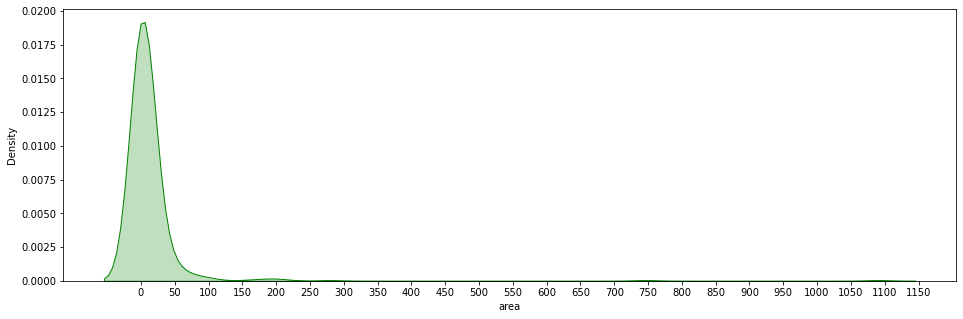

In [47]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['area'].skew()))
print("Kurtosis: {}".format(df1['area'].kurtosis()))
ax = sns.kdeplot(df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

The Data is highly skewed and has large kurtosis value

Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

In [48]:
dfa = df1[df1.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()

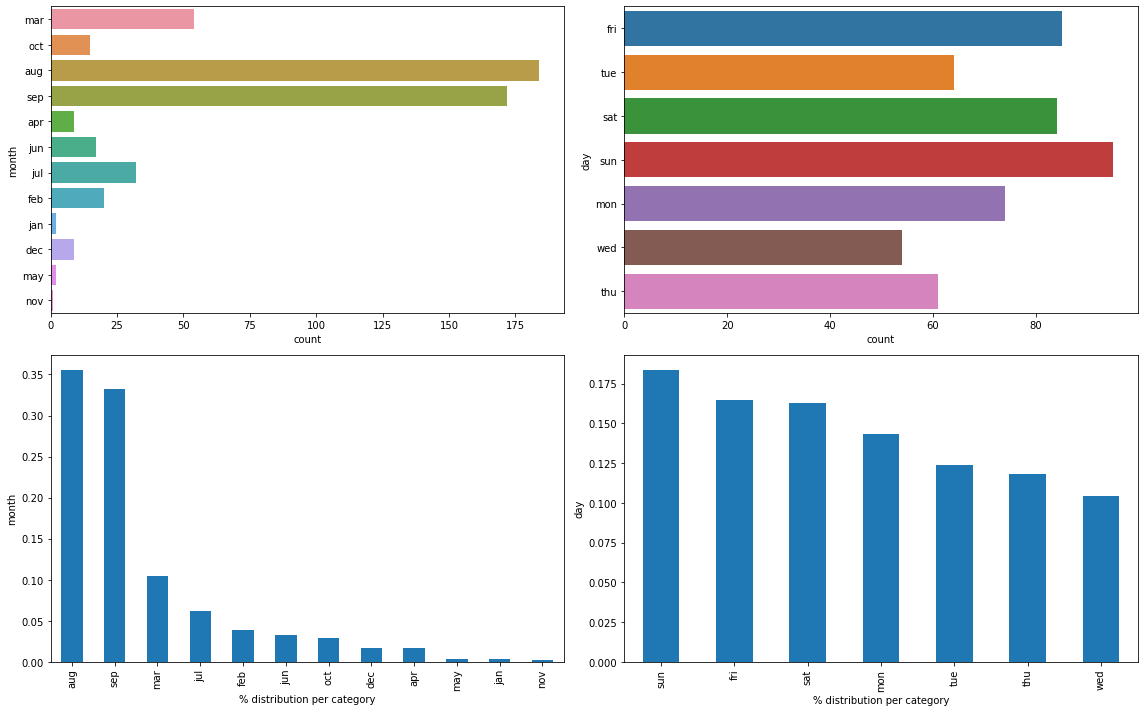

In [49]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

Majority of the fire occurs in the month Aug and Sep

For Days Sun and Fri have recorded the most cases

In [50]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

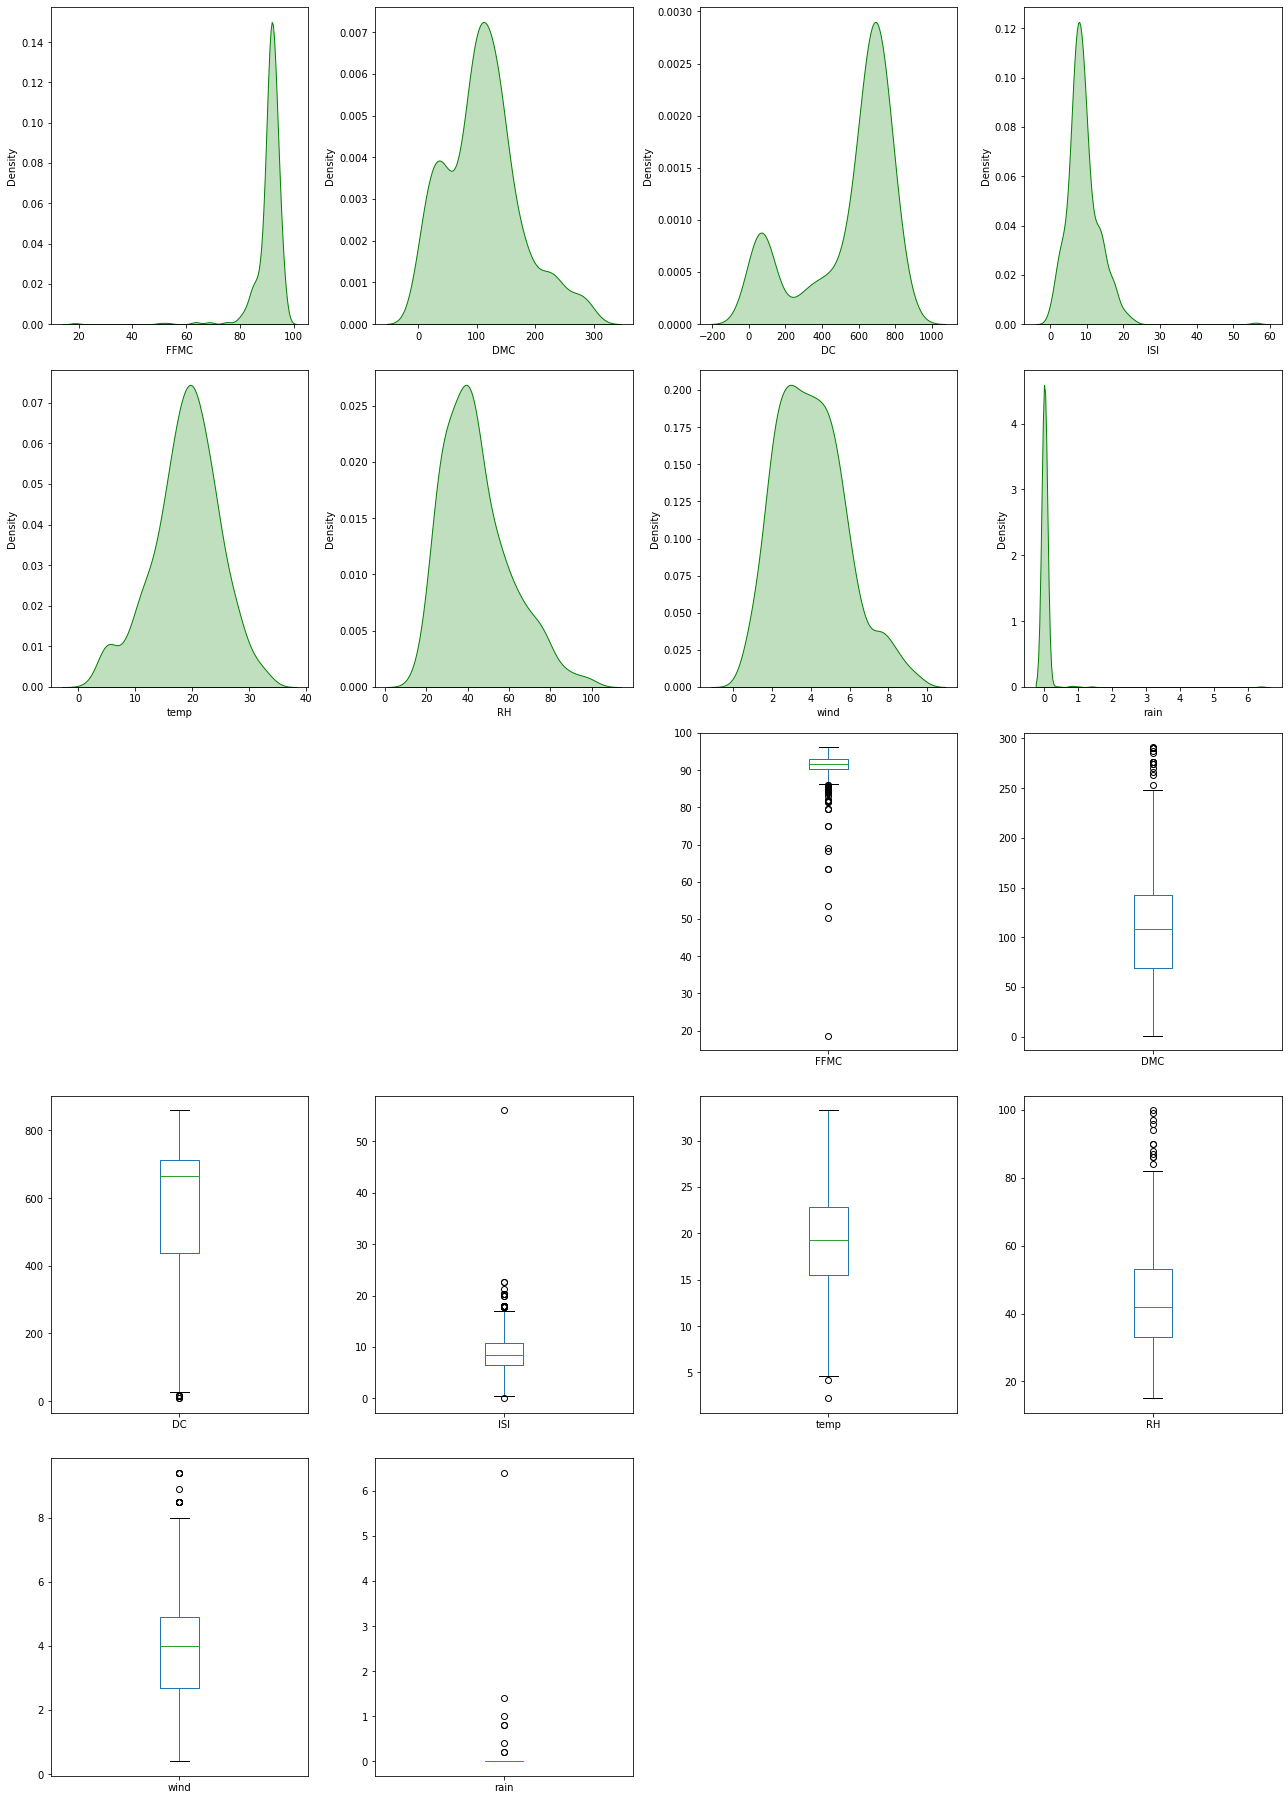

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [51]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [52]:
X = df1.iloc[:,2:30]
y = df1.iloc[:,30]

In [53]:
mapping = {'small': 1, 'large': 2}

In [54]:
y = y.replace(mapping)

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, stratify = y)

# Linear

In [56]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.9903846153846154


# Poly

In [57]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.7692307692307693


# RBF

In [58]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.75


# Sigmoid

In [59]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.6826923076923077


# Conclusion

Linear Model gives the best accuracy

Below is an example on how we can plot the data. I used PCA to select only 2 variables

In [60]:
ytt = y_train.to_numpy()

In [61]:
pca = PCA(n_components = 2)

In [62]:
x_train2 = pca.fit_transform(x_train)

In [63]:
model_linear.fit(x_train2,ytt)

SVC(kernel='linear')

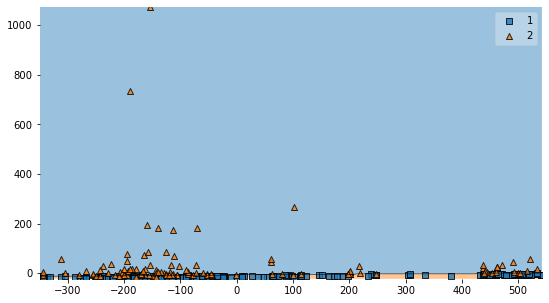

In [64]:
plot_decision_regions(x_train2,ytt, clf=model_linear)
plt.show()